In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
education_mapping = {
    'Basic': 'Basic',
    '2n Cycle': '2n Cycle',
    'Graduation': 'Graduation',
    'PhD': 'PhD',
    'Master': 'Master',
    np.nan: 'Unknown'
}

df_cust = pd.read_csv('customer_analysis.csv', sep='\t')

# 1. Age Extraction
current_year = 2023
df_cust['Age'] = current_year - df_cust['Year_Birth']

# 2. Spending Power
spending_categories = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df_cust['Spent'] = df_cust[spending_categories].sum(axis=1)

# 3. Household Living Arrangement
df_cust['Living_With'] = df_cust['Marital_Status']

# 4. Family Dynamics
df_cust['Children'] = df_cust['Kidhome'] + df_cust['Teenhome']

# 5. Family Unity
df_cust['Family_Size'] = df_cust['Children'] + 2  # Assuming 2 adults in a household

# 6. Parental Status
df_cust['Is_Parent'] = np.where(df_cust['Children'] > 0, 1, 0)

# 7. Educational Evolution
df_cust['Education'] = df_cust['Education'].map(education_mapping)

# 8. Farewell to Redundancy
redundant_features = ['Year_Birth', 'Marital_Status', 'Kidhome', 'Teenhome']
df_cust = df_cust.drop(redundant_features, axis=1)

# Convert date
df_cust['Dt_Customer'] = pd.to_datetime(df_cust['Dt_Customer'], format='%d-%m-%Y')

# Display the transformed DataFrame
df_cust.head()

,ID,Education,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Complain,Z_CostContact,Z_Revenue,Response,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,5524,Graduation,58138.0,2012-09-04,58,635,88,546,172,88,...,0,3,11,1,66,1617,Single,0,2,0
1,2174,Graduation,46344.0,2014-03-08,38,11,1,6,2,1,...,0,3,11,0,69,27,Single,2,4,1
2,4141,Graduation,71613.0,2013-08-21,26,426,49,127,111,21,...,0,3,11,0,58,776,Together,0,2,0
3,6182,Graduation,26646.0,2014-02-10,26,11,4,20,10,3,...,0,3,11,0,39,53,Together,1,3,1
4,5324,PhD,58293.0,2014-01-19,94,173,43,118,46,27,...,0,3,11,0,42,422,Married,1,3,1


In [3]:
#drop null values
df_cust = df_cust.dropna()
# drop Dt_Customer
df_cust = df_cust.drop(['Dt_Customer'], axis=1)

Label Encoding

In [4]:
label_encoder = LabelEncoder()
df_cust['Education'] = label_encoder.fit_transform(df_cust['Education'])
df_cust['Living_With'] = label_encoder.fit_transform(df_cust['Living_With'])

Scaling

In [5]:
scaler = StandardScaler()
numerical_features = ['Age', 'Income', 'Spent', 'Family_Size']
df_cust[numerical_features] = scaler.fit_transform(df_cust[numerical_features])

Dimensionality Reduction

In [6]:
n_components = 10 
pca = PCA(n_components=n_components)
reduced_data = pca.fit_transform(df_cust)

Clustering

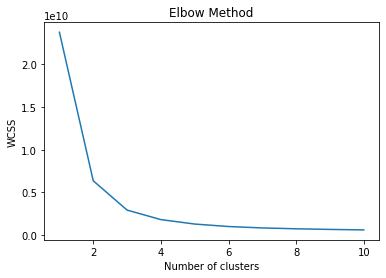

In [7]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(reduced_data)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [13]:
# kneed
from kneed import KneeLocator
kl = KneeLocator(range(1, 11), wcss, curve='convex', direction='decreasing')
print(kl.elbow)

3


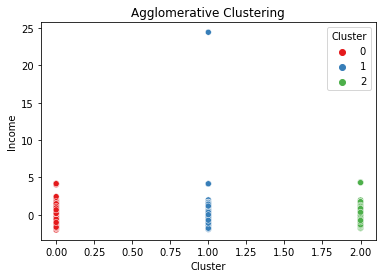

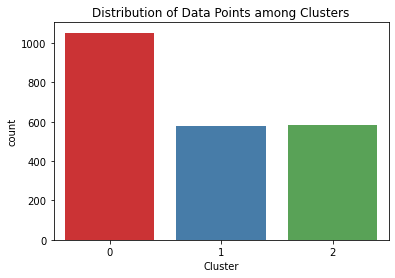

In [8]:
num_clusters = 3
agg_cluster = AgglomerativeClustering(n_clusters=num_clusters)
clusters = agg_cluster.fit_predict(reduced_data)
df_cust['Cluster'] = clusters

sns.scatterplot(x='Cluster', y='Income', hue='Cluster', data=df_cust, palette='Set1')
plt.title('Agglomerative Clustering')
plt.show()

sns.countplot(x='Cluster', data=df_cust, palette='Set1')
plt.title('Distribution of Data Points among Clusters')
plt.show()

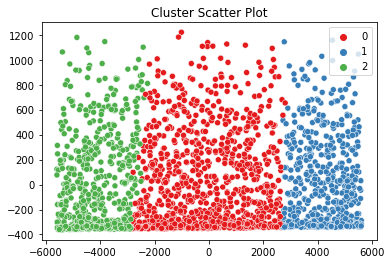

In [9]:
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=clusters, palette="Set1")
plt.title('Cluster Scatter Plot')
plt.show()

Visualization

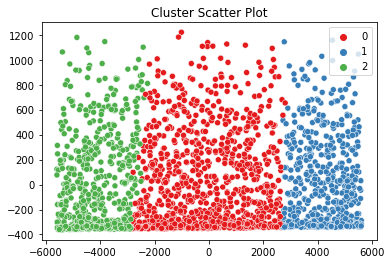

c:\Users\USER\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 88.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\USER\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 80.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\USER\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 81.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


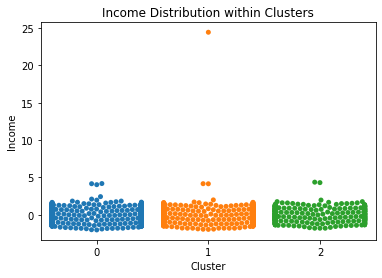

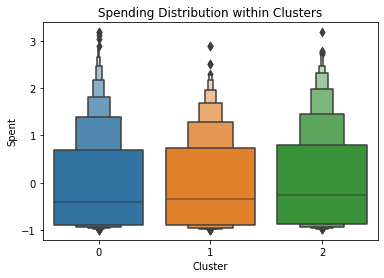

In [10]:
# Scatterplot
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=clusters, palette="Set1")
plt.title('Cluster Scatter Plot')
plt.show()

# Swarmplot
sns.swarmplot(x='Cluster', y='Income', data=df_cust)
plt.title('Income Distribution within Clusters')
plt.show()

# Boxenplot
sns.boxenplot(x='Cluster', y='Spent', data=df_cust)
plt.title('Spending Distribution within Clusters')
plt.show()

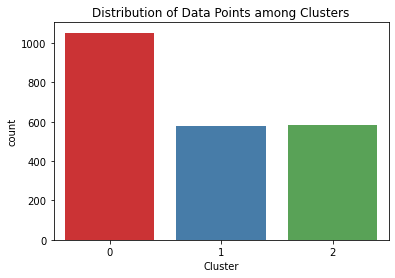

In [11]:
sns.countplot(x='Cluster', data=df_cust, palette='Set1')
plt.title('Distribution of Data Points among Clusters')
plt.show()

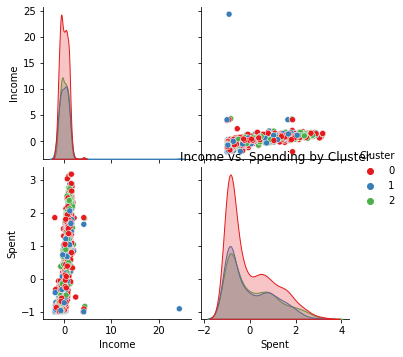

In [12]:
sns.pairplot(data=df_cust, hue='Cluster', vars=['Income', 'Spent'], palette='Set1')
plt.title('Income vs. Spending by Cluster')
plt.show()